<a href="https://colab.research.google.com/github/fbablu/Digital-Analog_Clock/blob/master/data_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd content/gdrive/MyDrive/2025_GDG_Solutions/model/data
%ls

[Errno 2] No such file or directory: 'gdrive/MyDrive/2025_GDG_Solutions/model/data'
/content/gdrive/MyDrive/2025_GDG_Solutions/model/data
correlated_outage/  eaglei_outages_2014_2022_minutes/


In [ ]:
"""
data description:


SOURCE 1
correlated_outage/

Obtained from:
https://data.openei.org/files/6458/Guideline_OEDI.docx


different files types {

  eaglei_outages_YEAR_agg.csv = {
    state: The state where the outage occurred.
    year: The year when the outage occurred.
    month: The month when the outage occurred (with 0 representing yearly summary).
    outage_count: The total number of outages in the specified period.
    max_outage_duration: The maximum duration (in hours) of any single outage during the specified period.
    customer_weighted_hours: The total customer-weighted hours, calculated by multiplying the number of affected customers by the outage duration.
  }

  eaglei_outages_YEAR_merged.csv = {
    fips: FIPS code identifying the county where the outage occurred.
    state: The state where the outage occurred.
    county: The county where the outage occurred.
    start_time: The time when the outage started.
    duration: The duration of the outage in hours.
    min_customers: The minimum number of affected customers during the outage.
    max_customers: The maximum number of affected customers during the outage.
    mean_customers: The average number of affected customers during the outage.
  }

  eaglei_outages_with_events_YEAR.csv = {
    fips: FIPS code representing the county where the outage occurred.
    state: The state where the outage occurred.
    county: The county where the outage occurred.
    start_time: The start time of the outage.
   	duration: The duration of the outage in hours.
    A unique identifier for the associated event (e.g., major storm)
   	event_type: The type of disturbance (e.g., hurricane) causing the outage.
  }
}



SOURCE 2
eaglei_outages_2014_2022_minutes/

Obtained from:
https://g-e320e6.63720f.75bc.data.globus.org/gen101/world-shared/doi-data/ORNLNCCS/202305/10.13139_ORNLNCCS_1975202/READMEdata.txt

"""

'\ndata description:\n\n\nSOURCE 1\ncorrelated_outage/ \n\nObtained from: \nhttps://data.openei.org/files/6458/Guideline_OEDI.docx\n\n\ndifferent files types {\n  \n  eaglei_outages_YEAR_agg.csv = {\n    state: The state where the outage occurred.\n    year: The year when the outage occurred.\n    month: The month when the outage occurred (with 0 representing yearly summary).\n    outage_count: The total number of outages in the specified period.\n    max_outage_duration: The maximum duration (in hours) of any single outage during the specified period.\n    customer_weighted_hours: The total customer-weighted hours, calculated by multiplying the number of affected customers by the outage duration.\n  }\n\n  eaglei_outages_YEAR_merged.csv = {\n    fips: FIPS code identifying the county where the outage occurred.\n    state: The state where the outage occurred.\n    county: The county where the outage occurred.\n    start_time: The time when the outage started.\n    duration: The duratio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import glob

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


BASE_PATH = "/content/gdrive/MyDrive/2025_GDG_Solutions/model/data/"

# Paths
CORRELATED_PATH = os.path.join(BASE_PATH, "correlated_outage/")
MINUTES_PATH = os.path.join(BASE_PATH, "eaglei_outages_2014_2022_minutes/")
TENNESSEE_FIPS_PREFIX = "47"

In [ ]:
# 1. Coverage data from mins outages (very small amount)
def load_coverage_data():
  coverage_path = os.path.join(MINUTES_PATH, "coverage_history.csv")
  coverage_df = pd.read_csv(coverage_path)

  tn_coverage = coverage_df[coverage_df['state'] == 'TN'].copy()
  tn_coverage['year'] = pd.to_datetime(tn_coverage['year'], format='mixed')
  tn_coverage['year'] = tn_coverage['year'].dt.year
  return tn_coverage


coverage_df = load_coverage_data()
coverage_df

,year,state,total_customers,min_covered,max_covered,min_pct_covered,max_pct_covered
230,2018,TN,3260708,1751326,1780999,0.54,0.55
231,2019,TN,3333179,1780999,2421848,0.53,0.73
232,2020,TN,3375533,2421848,2473590,0.72,0.73
233,2021,TN,3413499,2445113,2501720,0.72,0.73
234,2022,TN,3433064,2454449,2578021,0.71,0.75


In [ ]:
def load_agg_data(years=range(2014, 2023)):
    """Load aggregated outage data for Tennessee"""
    agg_dfs = []

    for year in years:
        file_path = os.path.join(CORRELATED_PATH, f"eaglei_outages_{year}_agg.csv")

        try:
            df = pd.read_csv(file_path)

            # Filter for Tennessee
            tn_df = df[df['state'] == 'Tennessee'].copy()
            agg_dfs.append(tn_df)
        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Combine all years
    if agg_dfs:
        combined_agg = pd.concat(agg_dfs, ignore_index=True)
        return combined_agg
    else:
        return pd.DataFrame()


aggs_df = load_agg_data()
print(aggs_df.head())

       state  year  month  outage_count  max_outage_duration  \
0  Tennessee  2014      0           181                19.75   
1  Tennessee  2014      1             0                 0.00   
2  Tennessee  2014      2             0                 0.00   
3  Tennessee  2014      3             0                 0.00   
4  Tennessee  2014      4             0                 0.00   

   customer_weighted_hours  
0                 250016.5  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  


In [ ]:
def load_merged_data(years=range(2014, 2023)):
    """Load merged outage data for Tennessee with a 'year' column."""
    merged_dfs = []

    for year in years:
        file_path = os.path.join(CORRELATED_PATH, f"eaglei_outages_{year}_merged.csv")

        try:
            df = pd.read_csv(file_path)
            tn_df = df[df['state'] == 'Tennessee'].copy()

            # Convert start_time to datetime safely, coercing errors
            tn_df['start_time'] = pd.to_datetime(tn_df['start_time'], errors='coerce')

            # Verify all values in start_time are datetime before applying .dt
            if not pd.api.types.is_datetime64_any_dtype(tn_df['start_time']):
                raise TypeError("start_time is not datetime after conversion.")

            # make year into a new col for later use
            tn_df['year'] = tn_df['start_time'].dt.year.astype(int)

            merged_dfs.append(tn_df)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    # Combine all years
    if merged_dfs:
        combined_merged = pd.concat(merged_dfs, ignore_index=True)
        return combined_merged
    else:
        return pd.DataFrame()

merged_dfs = load_merged_data()
print(merged_dfs.head())


    fips      state    county          start_time  duration  min_customers  \
0  47001  Tennessee  Anderson 2014-11-06 20:30:00      0.25          575.0   
1  47001  Tennessee  Anderson 2014-11-12 16:45:00      0.25          510.0   
2  47001  Tennessee  Anderson 2014-11-12 17:15:00      0.25         1413.0   
3  47001  Tennessee  Anderson 2014-11-16 13:45:00      1.00          471.0   
4  47001  Tennessee  Anderson 2014-11-19 19:00:00      1.00          406.0   

   max_customers  mean_customers  year  
0          575.0          575.00  2014  
1          510.0          510.00  2014  
2         1413.0         1413.00  2014  
3          471.0          471.00  2014  
4          511.0          483.75  2014  


In [ ]:
def load_events_data(years=range(2014, 2023)):
    """Load event-correlated outage data for Tennessee"""
    events_dfs = []

    for year in years:
        file_path = os.path.join(CORRELATED_PATH, f"eaglei_outages_with_events_{year}.csv")

        try:
            df = pd.read_csv(file_path)
            # Filter for Tennessee
            tn_df = df[df['state'] == 'Tennessee']
            events_dfs.append(tn_df)
        except FileNotFoundError:
            print(f"File not found: {file_path}")

    # Combine all years
    if events_dfs:
        combined_events = pd.concat(events_dfs, ignore_index=True)
        # Convert date columns to datetime
        date_columns = ['Datetime Event Began', 'Datetime Restoration', 'start_time', 'end_time']
        for col in date_columns:
            if col in combined_events.columns:
                combined_events[col] = pd.to_datetime(combined_events[col])
        return combined_events
    else:
        return pd.DataFrame()

events_dfs = load_events_data()
print(events_dfs.head())

      event_id state_event Datetime Event Began Datetime Restoration  \
0  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
1  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
2  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
3  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
4  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   

                Event Type   fips      state    county          start_time  \
0  Severe Weather - Winter  47001  Tennessee  Anderson 2015-01-09 04:15:00   
1  Severe Weather - Winter  47003  Tennessee   Bedford 2015-01-08 05:00:00   
2  Severe Weather - Winter  47009  Tennessee    Blount 2015-01-08 12:15:00   
3  Severe Weather - Winter  47009  Tennessee    Blount 2015-01-08 15:00:00   
4  Severe Weather - Winter  47037  Tennessee  Davidson 2015-01-07 23:30:00   

   duration            end_time  min_customers  max_customers  mean_customers  
0      2.50 2015-0

In [ ]:
def load_minutes_data(year, max_rows=None):
    """Load raw minutes-level outage data for Tennessee for a specific year"""

    file_path = os.path.join(MINUTES_PATH, f"eaglei_outages_{year}.csv")

    try:
        # Read with specific delimiter since the file format seems unusual
        df = pd.read_csv(file_path, delimiter=' ', nrows=max_rows, on_bad_lines='skip')

        # Filter for Tennessee FIPS codes (starting with 47)
        tn_df = df[df['fips_code'].astype(str).str.startswith(TENNESSEE_FIPS_PREFIX)]

        # Convert run_start_time to datetime
        tn_df['run_start_time'] = pd.to_datetime(tn_df['run_start_time'])

        return tn_df
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

        # Try alternative loading method if standard one fails
        try:
            df = pd.read_csv(file_path, nrows=max_rows)
            print("Column names in file:", df.columns.tolist())

            # If the file has different column structure, try to adapt
            if 'fips_code' not in df.columns and len(df.columns) >= 5:
                # Rename columns based on expected structure
                new_cols = ['fips_code', 'county', 'state', 'sum', 'run_start_time']
                df.columns = new_cols + list(df.columns[len(new_cols):])

            # Filter for Tennessee
            if 'state' in df.columns:
                tn_df = df[df['state'] == 'Tennessee']
            elif 'fips_code' in df.columns:
                tn_df = df[df['fips_code'].astype(str).str.startswith(TENNESSEE_FIPS_PREFIX)]
            else:
                print("Unable to filter for Tennessee - column structure unknown")
                return pd.DataFrame()

            return tn_df
        except Exception as e2:
            print(f"Alternative loading also failed: {e2}")
            return pd.DataFrame()

# mins_df = load_minutes_data(2014)
# # note, you will get error because of fips_code reading
# print(mins_df.head())

Error loading eaglei_outages_2014_2022_minutes/eaglei_outages_2014.csv: 'fips_code'
Column names in file: ['fips_code', 'county', 'state', 'sum', 'run_start_time']
     fips_code     county      state  sum       run_start_time
255      47009     Blount  Tennessee   23  2014-11-01 04:00:00
256      47157     Shelby  Tennessee   84  2014-11-01 04:00:00
555      47009     Blount  Tennessee   23  2014-11-01 04:15:00
556      47021   Cheatham  Tennessee    1  2014-11-01 04:15:00
557      47147  Robertson  Tennessee    1  2014-11-01 04:15:00


In [ ]:
def process_merged_data(merged_df):
    """Process and enhance the merged outage data"""
    if merged_df.empty:
        return merged_df

    # Create processed dataframe
    processed_df = merged_df.copy()

    # Add year, month, day, hour columns for easier filtering
    processed_df['year'] = processed_df['start_time'].dt.year
    processed_df['month'] = processed_df['start_time'].dt.month
    processed_df['day'] = processed_df['start_time'].dt.day
    processed_df['hour'] = processed_df['start_time'].dt.hour
    processed_df['dayofweek'] = processed_df['start_time'].dt.dayofweek

    # Calculate outage severity (customer-hours)
    processed_df['customer_hours'] = processed_df['mean_customers'] * processed_df['duration']

    # Add season column
    season_map = {
        1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring',
        5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'
    }
    processed_df['season'] = processed_df['month'].map(season_map)

    return processed_df

# processed_df = process_merged_data(merged_dfs)
# print(processed_df.head())

    fips      state    county          start_time  duration  min_customers  \
0  47001  Tennessee  Anderson 2014-11-06 20:30:00      0.25          575.0   
1  47001  Tennessee  Anderson 2014-11-12 16:45:00      0.25          510.0   
2  47001  Tennessee  Anderson 2014-11-12 17:15:00      0.25         1413.0   
3  47001  Tennessee  Anderson 2014-11-16 13:45:00      1.00          471.0   
4  47001  Tennessee  Anderson 2014-11-19 19:00:00      1.00          406.0   

   max_customers  mean_customers  year  month  day  hour  dayofweek  \
0          575.0          575.00  2014     11    6    20          3   
1          510.0          510.00  2014     11   12    16          2   
2         1413.0         1413.00  2014     11   12    17          2   
3          471.0          471.00  2014     11   16    13          6   
4          511.0          483.75  2014     11   19    19          2   

   customer_hours season  
0          143.75   Fall  
1          127.50   Fall  
2          353.25   Fal

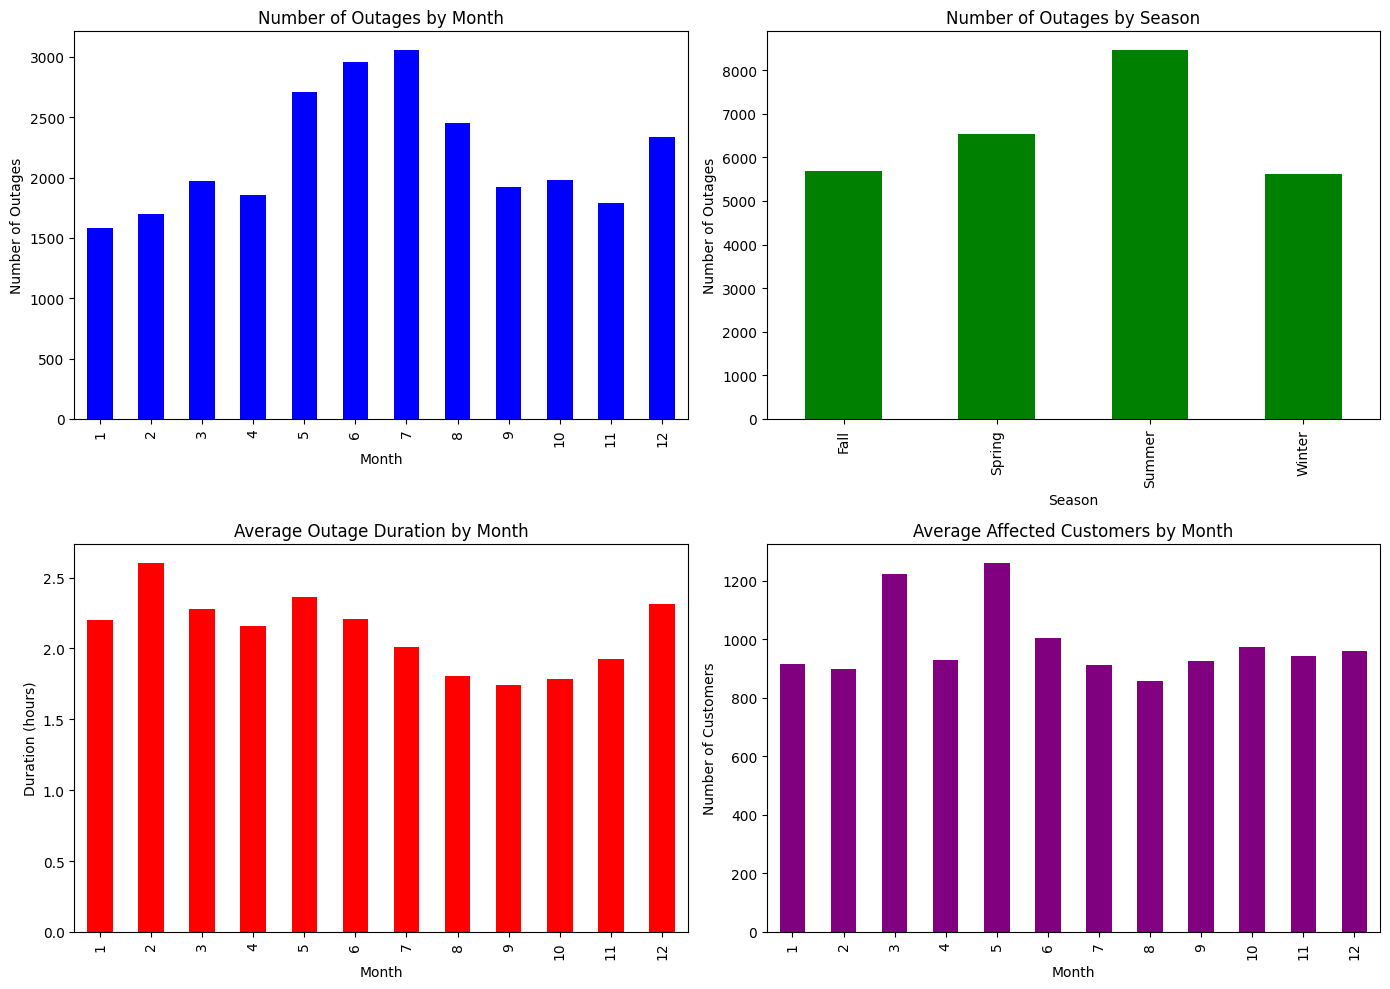

In [ ]:
def plot_seasonal_patterns(processed_df):
    """Plot seasonal patterns in outage data"""
    if processed_df.empty:
        print("No data available for plotting")
        return

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot 1: Outages by month
    monthly_counts = processed_df.groupby('month').size()
    monthly_counts.plot(kind='bar', ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Number of Outages by Month')
    axes[0, 0].set_xlabel('Month')
    axes[0, 0].set_ylabel('Number of Outages')

    # Plot 2: Outages by season
    season_counts = processed_df.groupby('season').size()
    season_counts.plot(kind='bar', ax=axes[0, 1], color='green')
    axes[0, 1].set_title('Number of Outages by Season')
    axes[0, 1].set_xlabel('Season')
    axes[0, 1].set_ylabel('Number of Outages')

    # Plot 3: Average duration by month
    monthly_duration = processed_df.groupby('month')['duration'].mean()
    monthly_duration.plot(kind='bar', ax=axes[1, 0], color='red')
    axes[1, 0].set_title('Average Outage Duration by Month')
    axes[1, 0].set_xlabel('Month')
    axes[1, 0].set_ylabel('Duration (hours)')

    # Plot 4: Average affected customers by month
    monthly_customers = processed_df.groupby('month')['mean_customers'].mean()
    monthly_customers.plot(kind='bar', ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('Average Affected Customers by Month')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Number of Customers')

    plt.tight_layout()
    plt.show()

# plot_seasonal_patterns(processed_df)

In [ ]:
def process_events_data(events_df):
    """Process and enhance the events outage data"""
    if events_df.empty:
        return events_df

    # Create processed dataframe
    processed_df = events_df.copy()

    # Calculate event duration in hours if both timestamps exist
    if 'Datetime Event Began' in processed_df.columns and 'Datetime Restoration' in processed_df.columns:
        processed_df['event_duration_hours'] = (
            processed_df['Datetime Restoration'] - processed_df['Datetime Event Began']
        ).dt.total_seconds() / 3600

    # Add year column for easier filtering
    if 'start_time' in processed_df.columns:
        processed_df['year'] = processed_df['start_time'].dt.year
        processed_df['month'] = processed_df['start_time'].dt.month

    return processed_df

# processed_events_df = process_events_data(events_dfs)
# print(processed_events_df.head())

      event_id state_event Datetime Event Began Datetime Restoration  \
0  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
1  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
2  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
3  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   
4  Tennessee-0   Tennessee  2015-01-07 17:00:00  2015-01-08 08:35:00   

                Event Type   fips      state    county          start_time  \
0  Severe Weather - Winter  47001  Tennessee  Anderson 2015-01-09 04:15:00   
1  Severe Weather - Winter  47003  Tennessee   Bedford 2015-01-08 05:00:00   
2  Severe Weather - Winter  47009  Tennessee    Blount 2015-01-08 12:15:00   
3  Severe Weather - Winter  47009  Tennessee    Blount 2015-01-08 15:00:00   
4  Severe Weather - Winter  47037  Tennessee  Davidson 2015-01-07 23:30:00   

   duration            end_time  min_customers  max_customers  mean_customers  \
0      2.50 2015-

In [ ]:
import pandas as pd

def get_yearly_summary(merged_df):
    """Create yearly summary of outage metrics."""
    if merged_df.empty:
        return pd.DataFrame()

    # Ensure 'year' column exists
    if 'year' not in merged_df.columns:
        merged_df['year'] = pd.to_datetime(merged_df['start_time']).dt.year

    # Aggregate yearly data
    yearly_summary = merged_df.groupby('year').agg({
        'fips': 'count',  # Number of outages
        'duration': ['mean', 'max', 'sum'],  # Duration metrics
        'mean_customers': ['mean', 'max', 'sum'],  # Customer metrics
    })

    # Flatten column names
    yearly_summary.columns = [f"{col[0]}_{col[1]}" for col in yearly_summary.columns]

    # Rename for clarity
    yearly_summary.rename(columns={
        'fips_count': 'outage_count',
        'duration_mean': 'avg_duration',
        'duration_max': 'max_duration',
        'duration_sum': 'total_duration',
        'mean_customers_mean': 'avg_affected_customers',
        'mean_customers_max': 'max_affected_customers',
        'mean_customers_sum': 'sum_affected_customers',
    }, inplace=True)

    return yearly_summary

# yearly_summary = get_yearly_summary(merged_dfs)
# yearly_summary

,outage_count,avg_duration,max_duration,total_duration,avg_affected_customers,max_affected_customers,sum_affected_customers
year,,,,,,,
2014,181,1.632597,19.75,295.50,812.457014,4325.172414,1.470547e+05
2015,1595,2.338088,75.50,3729.25,994.054479,20172.000000,1.585517e+06
2016,2006,2.183200,218.75,4379.50,929.686025,14332.333333,1.864950e+06
2017,2259,2.480301,144.25,5603.00,908.540566,76227.931868,2.052393e+06
2018,2615,1.834799,75.75,4798.00,951.791511,30159.000000,2.488935e+06
2019,3534,1.930532,103.75,6822.50,943.379921,36743.000000,3.333905e+06
2020,4310,2.189037,174.25,9434.75,1275.469114,119097.187500,5.497272e+06
2021,4403,1.936918,112.25,8528.25,915.950500,28184.000000,4.032930e+06
2022,5416,2.224705,305.00,12049.00,930.859438,42262.854918,5.041535e+06


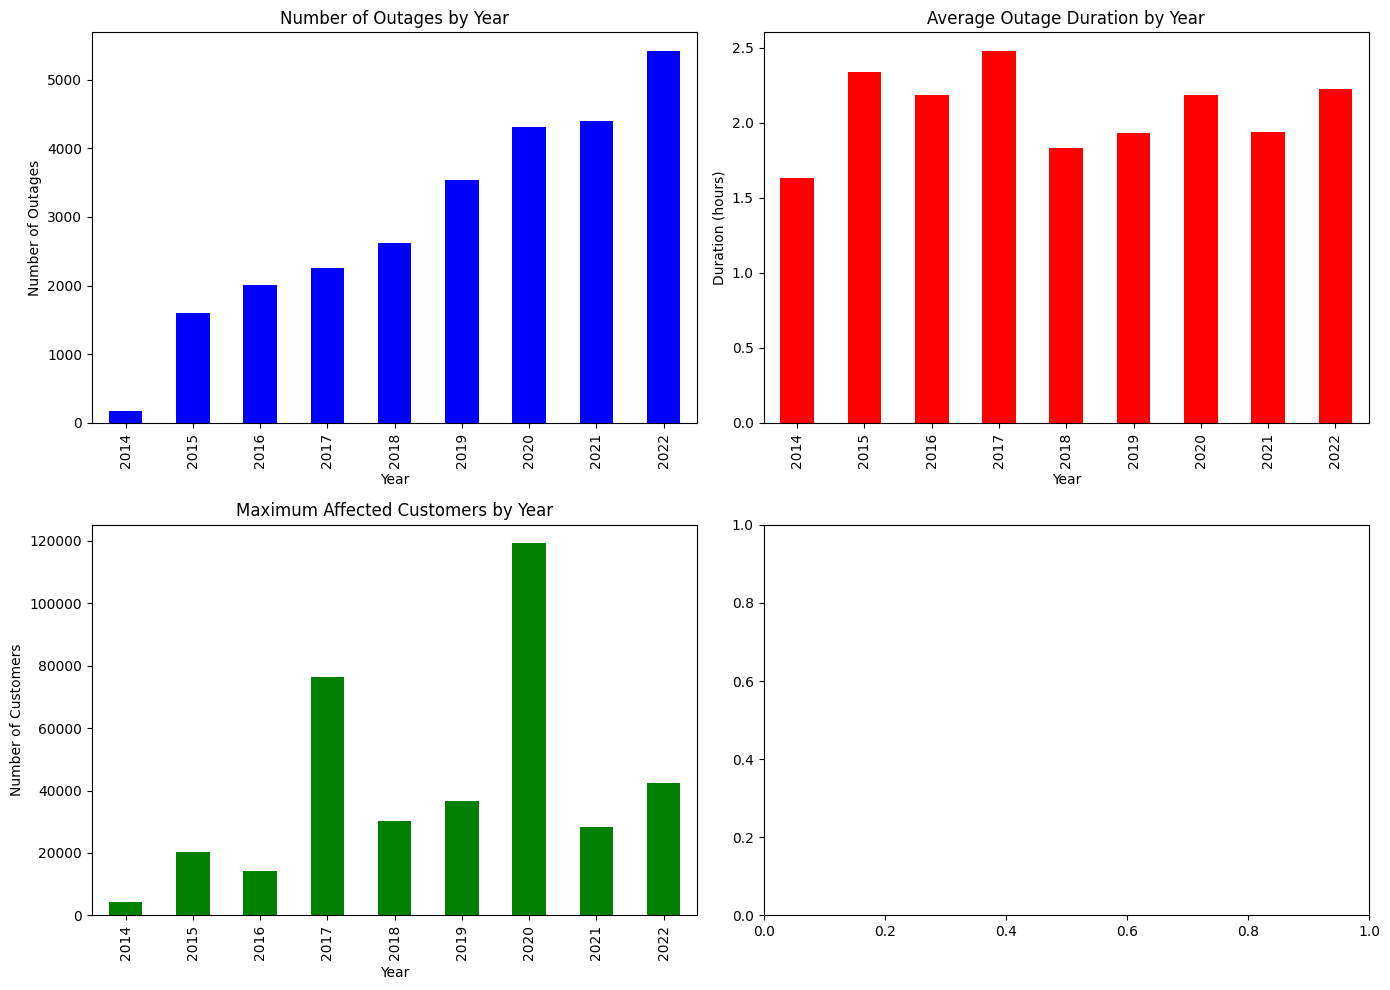

In [ ]:
def plot_yearly_outages(yearly_summary):
    """Plot yearly outage statistics"""
    if yearly_summary.empty:
        print("No data available for plotting")
        return

    fig, axes = plt.subplots(2,2, figsize=(14, 10))

    # Plot 1: Outage count by year
    yearly_summary['outage_count'].plot(kind='bar', ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Number of Outages by Year')
    axes[0, 0].set_xlabel('Year')
    axes[0, 0].set_ylabel('Number of Outages')

    # Plot 2: Average duration by year
    yearly_summary['avg_duration'].plot(kind='bar', ax=axes[0, 1], color='red')
    axes[0, 1].set_title('Average Outage Duration by Year')
    axes[0, 1].set_xlabel('Year')
    axes[0, 1].set_ylabel('Duration (hours)')

    # Plot 3: Maximum affected customers by year
    yearly_summary['max_affected_customers'].plot(kind='bar', ax=axes[1, 0], color='green')
    axes[1, 0].set_title('Maximum Affected Customers by Year')
    axes[1, 0].set_xlabel('Year')
    axes[1, 0].set_ylabel('Number of Customers')

    plt.tight_layout()
    plt.show()

# plot_yearly_outages(yearly_summary)

In [ ]:
def get_county_summary(merged_df):
    """Create county-level summary of outage metrics"""
    if merged_df.empty:
        return pd.DataFrame()

    county_summary = merged_df.groupby(['county', 'year']).agg({
        'fips': 'count',  # Number of outages
        'duration': ['mean', 'max', 'sum'],  # Duration metrics
        'mean_customers': ['mean', 'max', 'sum'],  # Customer metrics
    })

    # Flatten column names
    county_summary.columns = [f"{col[0]}_{col[1]}" for col in county_summary.columns]

    # Rename for clarity
    county_summary.rename(columns={
        'fips_count': 'outage_count',
        'duration_mean': 'avg_duration',
        'duration_max': 'max_duration',
        'duration_sum': 'total_duration',
        'mean_customers_mean': 'avg_affected_customers',
        'mean_customers_max': 'max_affected_customers',
        'mean_customers_sum': 'sum_affected_customers',
        'customer_hours_sum': 'total_customer_hours'
    }, inplace=True)

    return county_summary.reset_index()

# county_summary = get_county_summary(merged_dfs)
# print(county_summary.head())

     county  year  outage_count  avg_duration  max_duration  total_duration  \
0  Anderson  2014             7      0.500000          1.00            3.50   
1  Anderson  2015            31      0.870968          2.75           27.00   
2  Anderson  2016            43      0.831395          5.50           35.75   
3  Anderson  2017            33      1.106061          9.25           36.50   
4  Anderson  2018            38      0.532895          1.50           20.25   

   avg_affected_customers  max_affected_customers  sum_affected_customers  
0              681.964286                  1413.0             4773.750000  
1             1598.310906                  5576.0            49547.638095  
2              774.841086                  3732.0            33318.166700  
3              519.342991                  2781.0            17138.318694  
4              780.733772                  3478.0            29667.883333  


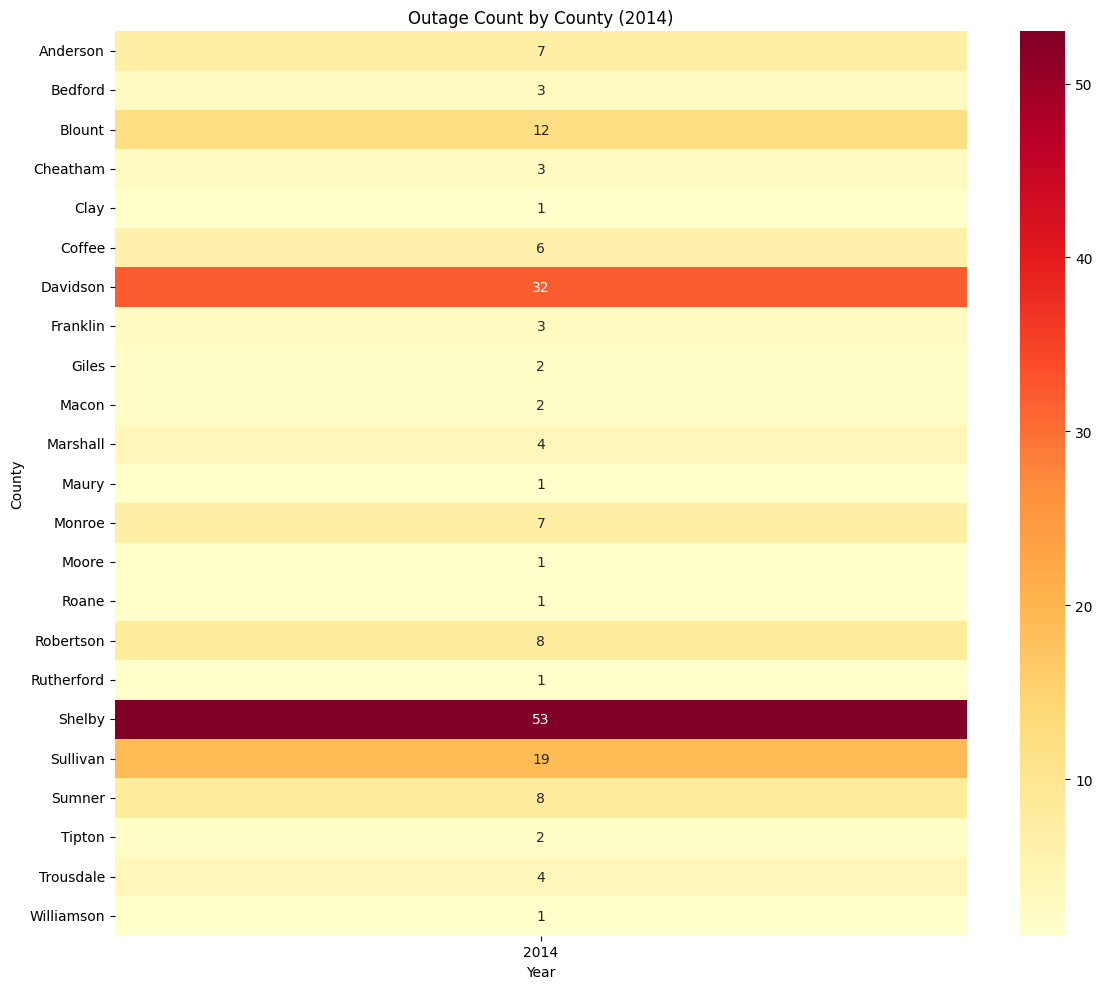

In [ ]:
def plot_county_heatmap(county_summary, year=None):
    """Create a heatmap of outage metrics by county"""
    if county_summary.empty:
        print("No data available for plotting")
        return

    # Filter by year if specified
    if year is not None:
        county_data = county_summary[county_summary['year'] == year]
    else:
        # Use the most recent year if not specified
        latest_year = county_summary['year'].max()
        county_data = county_summary[county_summary['year'] == latest_year]

    # Pivot data for heatmap
    pivot_data = county_data.pivot(index='county', columns='year', values='outage_count')

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='g')
    plt.title(f'Outage Count by County ({year if year else latest_year})')
    plt.ylabel('County')
    plt.xlabel('Year')
    plt.tight_layout()
    plt.show()

# plot_county_heatmap(county_summary, year=2014)

In [ ]:
def get_event_summary(events_df):
    """Create summary of outage events"""
    if events_df.empty:
        return pd.DataFrame()

    # Group by event ID
    event_summary = events_df.groupby(['event_id', 'Event Type']).agg({
        'county': 'nunique',  # Number of counties affected
        'duration': ['mean', 'max', 'sum'],  # Duration metrics
        'mean_customers': ['mean', 'max', 'sum'],  # Customer metrics
    })

    # Flatten column names
    event_summary.columns = [f"{col[0]}_{col[1]}" for col in event_summary.columns]

    # Rename for clarity
    event_summary.rename(columns={
        'county_nunique': 'counties_affected',
        'duration_mean': 'avg_duration',
        'duration_max': 'max_duration',
        'duration_sum': 'total_duration',
        'mean_customers_mean': 'avg_affected_customers',
        'mean_customers_max': 'max_affected_customers',
        'mean_customers_sum': 'sum_affected_customers'
    }, inplace=True)

    return event_summary.reset_index()

# event_summary = get_event_summary(events_dfs)
# print(event_summary.head())

      event_id                 Event Type  counties_affected  avg_duration  \
0  Tennessee-0             Severe Weather                 65      4.066614   
1  Tennessee-0    Severe Weather - Winter                  9      1.702381   
2  Tennessee-0  Transmission Interruption                 70      2.321705   
3  Tennessee-0                  Vandalism                 14      1.325000   
4  Tennessee-1             Severe Weather                 63      4.925987   

   max_duration  total_duration  avg_affected_customers  \
0         41.00         1297.25             1179.600283   
1          6.25           71.50              966.889350   
2         54.75          898.50             1310.769087   
3          4.25           39.75              731.253974   
4        112.25         2246.25             2230.728117   

   max_affected_customers  sum_affected_customers  
0            36743.000000            3.762925e+05  
1             6617.000000            4.060935e+04  
2            16750.9

In [ ]:
def prepare_modeling_data(merged_df, events_df=None):
    """Prepare data for predictive modeling"""
    if merged_df.empty:
        return pd.DataFrame()

    # Start with processed merged data
    model_df = process_merged_data(merged_df).copy()

    # Add event flags if events data is available
    if events_df is not None and not events_df.empty:
        # Create event type flags
        event_types = events_df['Event Type'].unique()

        # Initialize event flags as False
        for event_type in event_types:
            safe_col_name = event_type.lower().replace(' ', '_').replace('-', '_')
            model_df[f'event_{safe_col_name}'] = False

        # Match outages with events based on county and time
        for idx, row in model_df.iterrows():
            # Find matching events
            matching_events = events_df[
                (events_df['county'] == row['county']) &
                (events_df['start_time'] <= row['start_time']) &
                (events_df['end_time'] >= row['start_time'])
            ]

            # Set event flags
            for _, event in matching_events.iterrows():
                event_type = event['Event Type']
                safe_col_name = event_type.lower().replace(' ', '_').replace('-', '_')
                model_df.at[idx, f'event_{safe_col_name}'] = True

    # Add seasonal features for modeling
    model_df['sin_month'] = np.sin(2 * np.pi * model_df['month'] / 12)
    model_df['cos_month'] = np.cos(2 * np.pi * model_df['month'] / 12)

    # One-hot encode categorical variables
    if 'county' in model_df.columns:
        county_dummies = pd.get_dummies(model_df['county'], prefix='county')
        model_df = pd.concat([model_df, county_dummies], axis=1)

    if 'season' in model_df.columns:
        season_dummies = pd.get_dummies(model_df['season'], prefix='season')
        model_df = pd.concat([model_df, season_dummies], axis=1)

    return model_df

In [ ]:
def main():
    """Main execution function"""
    print("Loading Tennessee power outage data...")

    # Load coverage data
    coverage_df = load_coverage_data()
    print(f"Coverage data loaded: {len(coverage_df)} rows")
    if not coverage_df.empty:
        print("\nTennessee Coverage Data:")
        print(coverage_df)

    # Load aggregated data
    agg_df = load_agg_data()
    print(f"Aggregated data loaded: {len(agg_df)} rows")
    if not agg_df.empty:
        print("\nTennessee Aggregated Data Sample:")
        print(agg_df.head())

    # Load merged data
    merged_df = load_merged_data()
    print(f"Merged data loaded: {len(merged_df)} rows")
    if not merged_df.empty:
        print("\nTennessee Merged Data Sample:")
        print(merged_df.head())

    # Load events data
    events_df = load_events_data()
    print(f"Events data loaded: {len(events_df)} rows")
    if not events_df.empty:
        print("\nTennessee Events Data Sample:")
        print(events_df.head())

    # Process merged data
    if not merged_df.empty:
        processed_df = process_merged_data(merged_df)
        print("\nProcessed Merged Data Sample:")
        print(processed_df.head())

        # Create yearly summary
        yearly_summary = get_yearly_summary(processed_df)
        print("\nYearly Summary:")
        print(yearly_summary)

        # Create county summary
        county_summary = get_county_summary(processed_df)
        print("\nCounty Summary (head of 5 counties):")
        print(county_summary.head())


        # Prepare modeling data
        print("\nPreparing data for modeling...")
        model_df = prepare_modeling_data(merged_df, events_df)
        print("Modeling data sample:")
        print(model_df.head())

        return {
            'coverage_df': coverage_df,
            'agg_df': agg_df,
            'merged_df': merged_df,
            'events_df': events_df,
            'processed_df': processed_df,
            'yearly_summary': yearly_summary,
            'county_summary': county_summary,
            'model_df': model_df
        }
    else:
        print("No merged data available for processing")
        return {}

# Run the main function when executing the notebook
if __name__ == "__main__":
    result_data = main()

Loading Tennessee power outage data...
Coverage data loaded: 5 rows

Tennessee Coverage Data:
     year state  total_customers  min_covered  max_covered  min_pct_covered  \
230  2018    TN          3260708      1751326      1780999             0.54   
231  2019    TN          3333179      1780999      2421848             0.53   
232  2020    TN          3375533      2421848      2473590             0.72   
233  2021    TN          3413499      2445113      2501720             0.72   
234  2022    TN          3433064      2454449      2578021             0.71   

     max_pct_covered  
230             0.55  
231             0.73  
232             0.73  
233             0.73  
234             0.75  
Aggregated data loaded: 117 rows

Tennessee Aggregated Data Sample:
       state  year  month  outage_count  max_outage_duration  \
0  Tennessee  2014      0           181                19.75   
1  Tennessee  2014      1             0                 0.00   
2  Tennessee  2014      2        